In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
img_path = "../DCI/data/densely_captioned_images/photos/sa_1543971.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

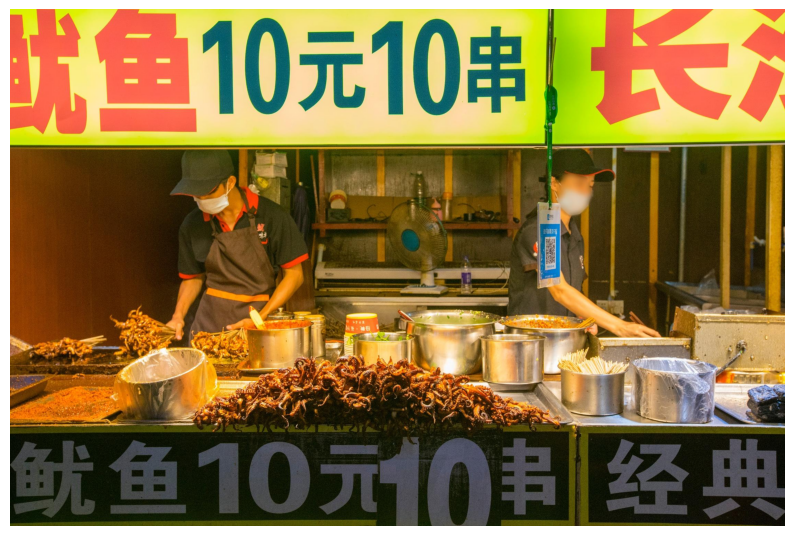

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
image.shape

(1500, 2250, 3)

In [5]:
import sys
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator = SamAutomaticMaskGenerator(sam)

In [6]:
masks = mask_generator.generate(image)

In [30]:
mask = masks[7]
mask

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 18533,
 'bbox': [260, 289, 280, 67],
 'predicted_iou': 1.00760018825531,
 'point_coords': [[316.40625, 304.6875]],
 'stability_score': 0.9885784983634949,
 'crop_box': [0, 0, 2250, 1500]}

In [9]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

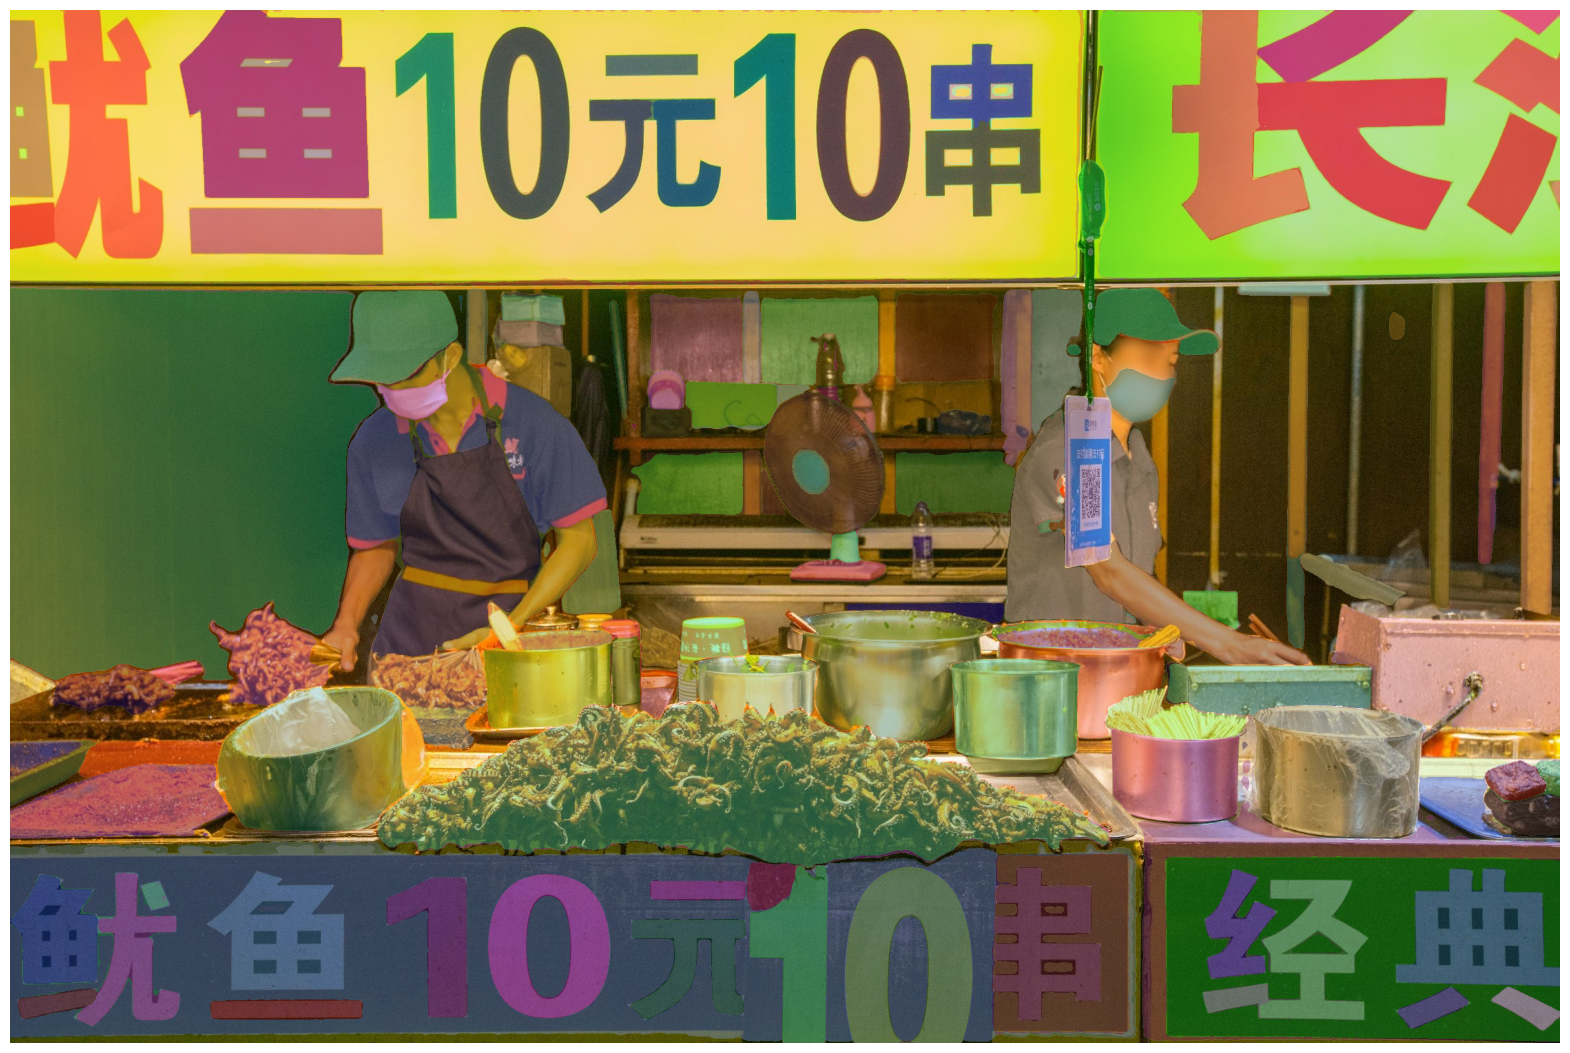

In [10]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

165
[900, 1265, 167, 200]
0.51%
{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 18533, 'bbox': [260, 289, 280, 67], 'predicted_iou': 1.00760018825531, 'point_coords': [[316.40625, 304.6875]], 'stability_score': 0.9885784983634949, 'crop_box': [0, 0, 2250, 1500]}


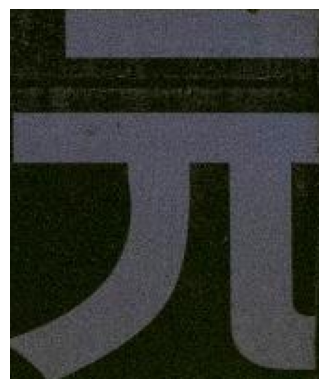

In [93]:
def slice_image(cv2_img, x1, y1, x2, y2):
    # Slice the image using the coordinates
    # Note: In OpenCV, y comes first in the slicing
    sliced_img = cv2_img[y1:y2, x1:x2]
    return sliced_img
total_pixels = image.shape[0] * image.shape[1]
n = 80
print(len(masks))
coords = masks[n]['bbox']
print(coords)
print(f"{masks[n]['area'] / total_pixels * 100:.2f}%" )
print(mask)
croped_img = slice_image(image, x1=coords[0], y1=coords[1], x2=coords[0]+coords[2], y2=coords[1]+coords[3])
plt.imshow(croped_img)
plt.axis('off')
plt.savefig('image.png')
plt.show()


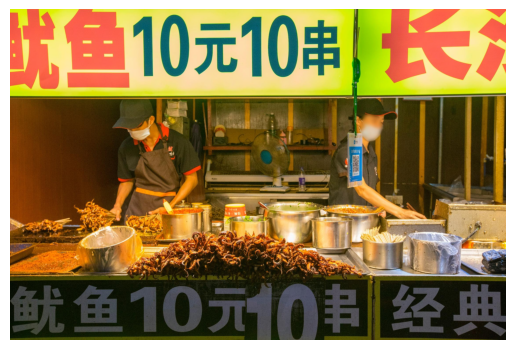

In [94]:
plt.imshow(image)
plt.axis('off')
plt.savefig('image.png')
plt.show()

In [8]:
import os

imgs = os.listdir("masks")
max_files = 0
for img in imgs:
    files = os.listdir(os.path.join("masks", img))
    img_files = [file for file in files if file.endswith(".png")]
    num_files = len(img_files)
    if num_files > max_files:
        max_files = num_files
max_files

36

In [10]:
import torch

e = torch.load("masks/image_0/image_embeds.pt")

In [12]:
for i in range(e.shape[0]):
    print(torch.norm(e[i]))

tensor(1.)
tensor(1.)
tensor(1.0000)
tensor(1.0000)
tensor(1.)
tensor(1.)
tensor(1.0000)
tensor(1.0000)
tensor(1.)
tensor(1.0000)
tensor(1.0000)
tensor(1.)
tensor(1.0000)
tensor(1.)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.)
tensor(1.)
tensor(1.0000)
tensor(1.0000)
tensor(1.)
